# LOAN PREDICTION USING MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train=pd.read_csv("train.csv")

In [2]:
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
train.shape

(614, 13)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# EXPLORATORY DATA ANALYSIS


<AxesSubplot:>

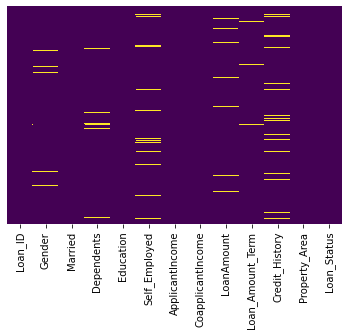

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

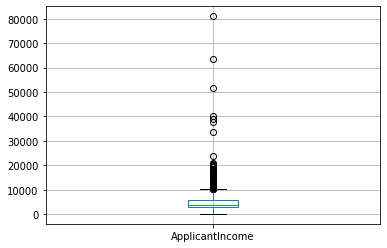

In [17]:
train.boxplot(column='ApplicantIncome')

<AxesSubplot:>

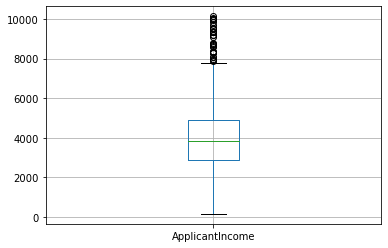

In [7]:
q1=train.ApplicantIncome.quantile(0.25)
q3=train.ApplicantIncome.quantile(0.75)
iqr=q3-q1
l=q1-1.5*iqr
r=q3+1.5*iqr
med=np.median(train.ApplicantIncome)
for i in train.ApplicantIncome:
    if i>r or i<l:
        train.ApplicantIncome=train.ApplicantIncome.replace(i,med)
        
train.boxplot(column='ApplicantIncome')

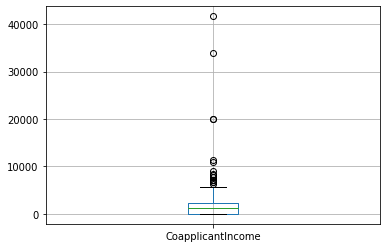

In [19]:
train.boxplot(column='CoapplicantIncome')

<AxesSubplot:>

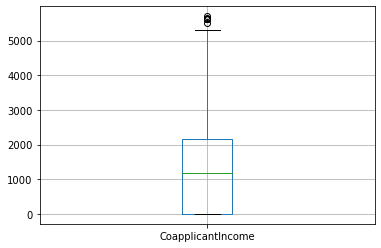

In [8]:
q1=train.CoapplicantIncome.quantile(0.25)
q3=train.CoapplicantIncome.quantile(0.75)
iqr=q3-q1
l=q1-1.5*iqr
r=q3+1.5*iqr
med=np.median(train.CoapplicantIncome)
for i in train.CoapplicantIncome:
    if i>r or i<l:
        train.CoapplicantIncome=train.CoapplicantIncome.replace(i,med)
        
train.boxplot(column='CoapplicantIncome')

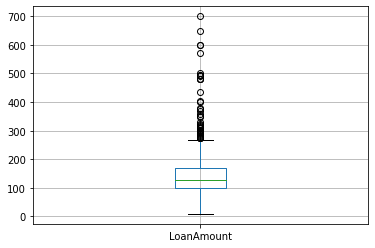

In [21]:
train.boxplot(column='LoanAmount')

<AxesSubplot:>

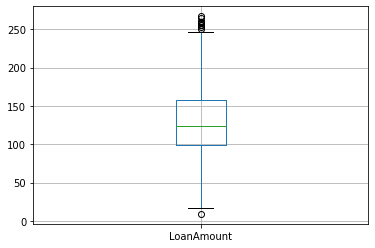

In [9]:
q1=train.LoanAmount.quantile(0.25)
q3=train.LoanAmount.quantile(0.75)
iqr=q3-q1
l=q1-1.5*iqr
r=q3+1.5*iqr
med=np.median(train.LoanAmount)
for i in train.LoanAmount:
    if i>r or i<l:
        train.LoanAmount=train.LoanAmount.replace(i,med)
        
train.boxplot(column='LoanAmount')

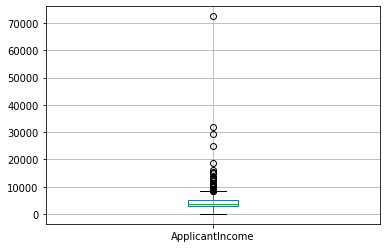

In [26]:
test.boxplot(column='ApplicantIncome')

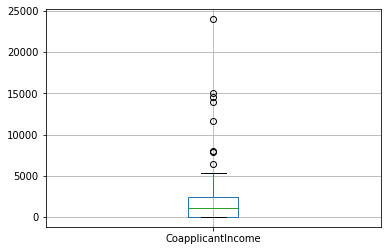

In [27]:
test.boxplot(column='CoapplicantIncome')

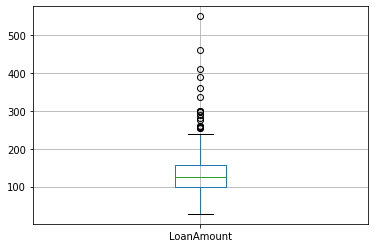

In [28]:
test.boxplot(column='LoanAmount')

<AxesSubplot:xlabel='Married', ylabel='count'>

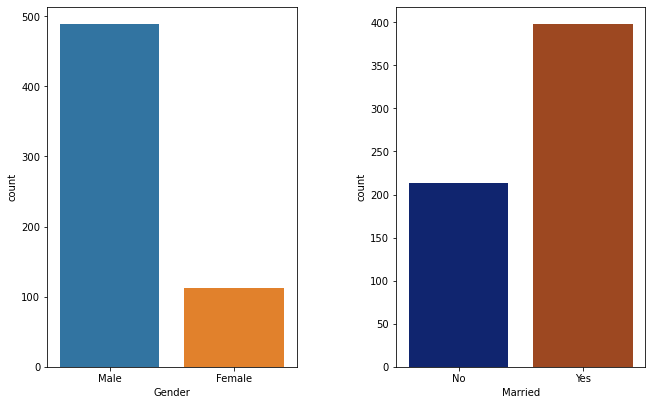

In [10]:
plt.figure(figsize=(40,10))
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.6, top=0.6,
                      wspace=0.4, hspace=0.1)
plt.subplot(141)
sns.countplot(x='Gender',data=train)
plt.subplot(142)
sns.countplot(x='Married',data=train,palette='dark')


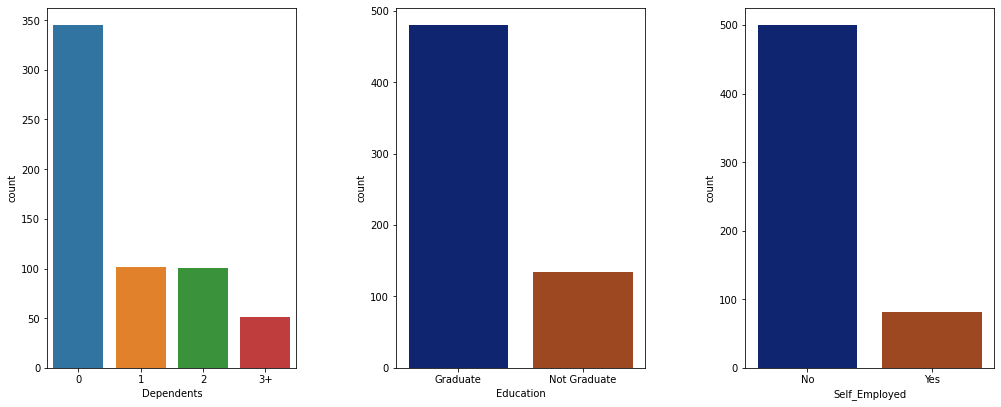

In [30]:
plt.figure(figsize=(40,10))
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.6, top=0.6,
                      wspace=0.4, hspace=0.1)
plt.subplot(141)
sns.countplot(x='Dependents',data=train)
plt.subplot(142)
sns.countplot(x='Education',data=train,palette='dark')
plt.subplot(143)
sns.countplot(x='Self_Employed',data=train,palette='dark')



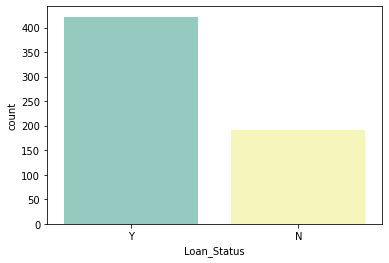

In [31]:
sns.countplot(x='Loan_Status',data=train,palette='Set3')

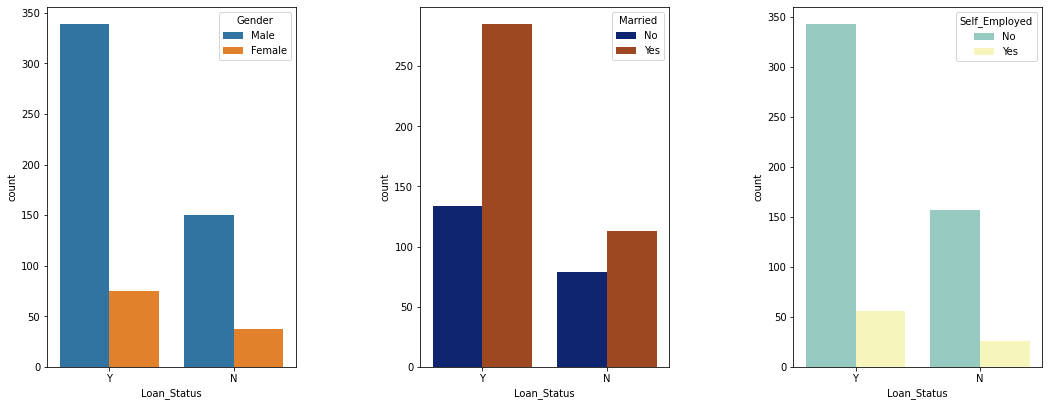

In [32]:
plt.figure(figsize=(40,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.6, top=0.6,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
sns.countplot(x='Loan_Status',hue='Gender',data=train)
plt.subplot(142)
sns.countplot(x='Loan_Status',hue='Married',data=train,palette='dark')
plt.subplot(143)
sns.countplot(x='Loan_Status',hue='Self_Employed',data=train,palette='Set3')

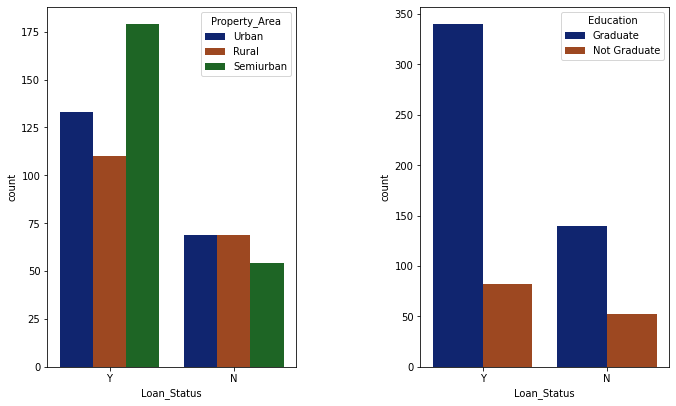

In [34]:

plt.figure(figsize=(40,10))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.6, top=0.6,
                      wspace=0.5, hspace=0.2)
plt.subplot(141)
sns.countplot(x='Loan_Status',hue='Property_Area',data=train,palette='dark')
plt.subplot(142)
sns.countplot(x='Loan_Status',hue='Education',data=train,palette='dark')

C:\Users\ABHISHEK\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

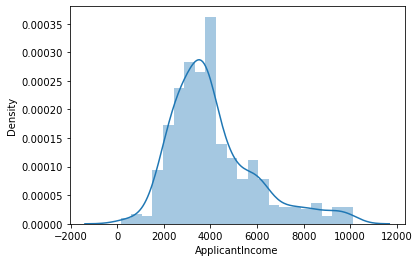

In [15]:
sns.distplot(train['ApplicantIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


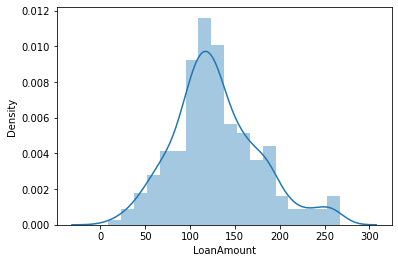

In [36]:
sns.distplot(train['LoanAmount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


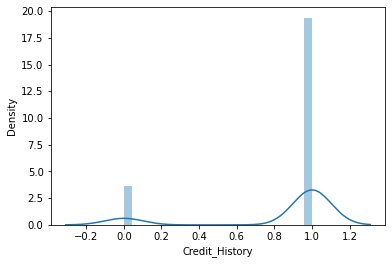

In [37]:
sns.distplot(train['Credit_History'])

# HANDLING NULL VALUES

In [11]:
train['Gender'] = train['Gender'].fillna( train['Gender'].dropna().mode().values[0] )

train['Married'] = train['Married'].fillna( train['Married'].dropna().mode().values[0] )

train['Dependents'] = train['Dependents'].fillna( train['Dependents'].dropna().mode().values[0] )

train['Self_Employed'] = train['Self_Employed'].fillna( train['Self_Employed'].dropna().mode().values[0] )

train['LoanAmount'] = train['LoanAmount'].fillna( train['LoanAmount'].dropna().mean() )

train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna( train['Loan_Amount_Term'].dropna().mode().values[0] )

train['Credit_History'] = train['Credit_History'].fillna( train['Credit_History'].dropna().mode().values[0] )



In [10]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
train['Gender'] = train['Gender'].map({'Female':0,'Male':1}).astype(np.int)
train['Married'] = train['Married'].map({'No':0, 'Yes':1}).astype(np.int)
train['Education'] = train['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
train['Self_Employed'] = train['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
train['Loan_Status'] = train['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)




In [13]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

In [14]:
train['Property_Area']=label_encoder.fit_transform(train['Property_Area']) 
train['Credit_History']=label_encoder.fit_transform(train['Credit_History'])
train['Dependents']=label_encoder.fit_transform(train['Dependents'])



In [15]:
train.head()

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001002       1        0           0          1              0   
1  LP001003       1        1           1          1              0   
2  LP001005       1        1           0          1              1   
3  LP001006       1        1           0          0              0   
4  LP001008       1        0           0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0       129.0             360.0   
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0               1              2            1  
1               1              0            0  
2               1              2            1  
3               1              2            1  
4               1              2            1

In [16]:
train.drop(['Loan_ID','CoapplicantIncome'],inplace=True,axis=1)

In [17]:
train.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0           5849.0   
1       1        1           1          1              0           4583.0   
2       1        1           0          1              1           3000.0   
3       1        1           0          0              0           2583.0   
4       1        0           0          1              0           6000.0   

   LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  
0       129.0             360.0               1              2            1  
1       128.0             360.0               1              0            0  
2        66.0             360.0               1              2            1  
3       120.0             360.0               1              2            1  
4       141.0             360.0               1              2            1

# TRAIN TEST SPLIT


In [18]:
Y = train['Loan_Status']
X = train.drop(['Loan_Status'],axis =1)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state =0)

# LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression 

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [21]:
logpredictions = logmodel.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(logpredictions,Y_test))
print(classification_report(logpredictions,Y_test))

[[14  2]
 [19 88]]
              precision    recall  f1-score   support

           0       0.42      0.88      0.57        16
           1       0.98      0.82      0.89       107

    accuracy                           0.83       123
   macro avg       0.70      0.85      0.73       123
weighted avg       0.91      0.83      0.85       123



# SUPPORT VECTOR MACHINE

In [23]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train)

SVC()

In [25]:
svcpredictions = svc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(svcpredictions,Y_test))
print(classification_report(svcpredictions,Y_test))

[[ 0  0]
 [33 90]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.73      0.85       123

    accuracy                           0.73       123
   macro avg       0.50      0.37      0.42       123
weighted avg       1.00      0.73      0.85       123



C:\Users\ABHISHEK\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# DECISION TREE

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=1)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [28]:
dtc_predictions = dtc.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(dtc_predictions,Y_test))
print(classification_report(dtc_predictions,Y_test))

[[14  2]
 [19 88]]
              precision    recall  f1-score   support

           0       0.42      0.88      0.57        16
           1       0.98      0.82      0.89       107

    accuracy                           0.83       123
   macro avg       0.70      0.85      0.73       123
weighted avg       0.91      0.83      0.85       123



# RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators =400, criterion='entropy', oob_score=True, random_state=1,n_jobs=-1)
rfc.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, n_jobs=-1,
                       oob_score=True, random_state=1)

In [31]:
rfc_predictions = rfc.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(rfc_predictions,Y_test))
print(classification_report(rfc_predictions,Y_test))

[[15  8]
 [18 82]]
              precision    recall  f1-score   support

           0       0.45      0.65      0.54        23
           1       0.91      0.82      0.86       100

    accuracy                           0.79       123
   macro avg       0.68      0.74      0.70       123
weighted avg       0.83      0.79      0.80       123



# XGBOOST CLASSIFIER

In [34]:
import xgboost as xgb
my_model = xgb.XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)


In [35]:
my_model.fit(X_train,Y_train)

C:\Users\ABHISHEK\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

Gender -> 0.03215668
Married -> 0.041933186
Dependents -> 0.03727411
Education -> 0.045788676
Self_Employed -> 0.057319783
ApplicantIncome -> 0.042677026
LoanAmount -> 0.041791063
Loan_Amount_Term -> 0.06657359
Credit_History -> 0.5988594
Property_Area -> 0.035626486


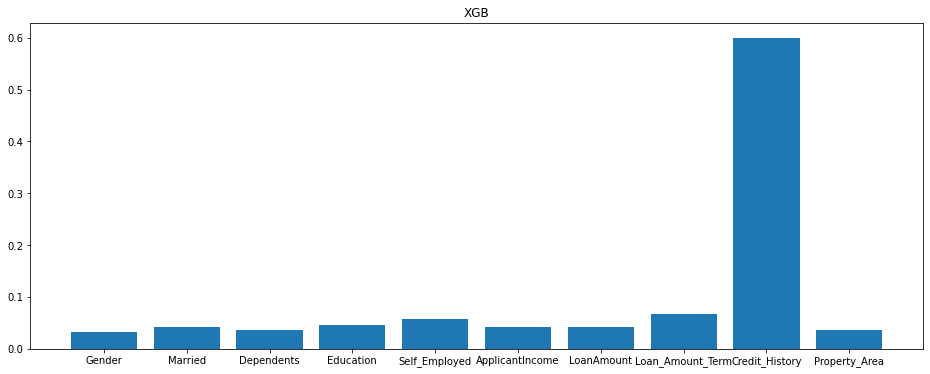

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

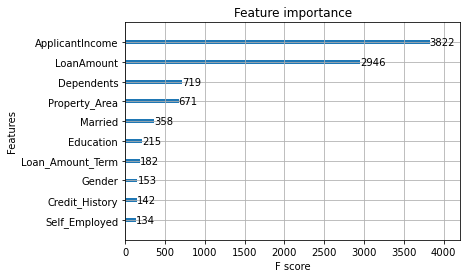

In [36]:
features = my_model.feature_importances_
Columns = X.columns
for i,j in enumerate(features):
    print(Columns[i],"->",j)
 
plt.figure(figsize=(16,6))
plt.title(label="XGB")
#plt.bar([x for x in range(len(features))],features)
plt.bar([x for x in (Columns)],features)
plt.show()
from xgboost import plot_importance
plot_importance(my_model)

In [37]:
predictions1 = my_model.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(predictions1,Y_test))
print(classification_report(predictions1,Y_test))

[[18 16]
 [15 74]]
              precision    recall  f1-score   support

           0       0.55      0.53      0.54        34
           1       0.82      0.83      0.83        89

    accuracy                           0.75       123
   macro avg       0.68      0.68      0.68       123
weighted avg       0.75      0.75      0.75       123



# GRADIENT BOOST

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_train, Y_train)
pred_gbc = gbk.predict(X_test)


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(pred_gbc,Y_test))
print(classification_report(pred_gbc,Y_test))

[[15  6]
 [18 84]]
              precision    recall  f1-score   support

           0       0.45      0.71      0.56        21
           1       0.93      0.82      0.87       102

    accuracy                           0.80       123
   macro avg       0.69      0.77      0.72       123
weighted avg       0.85      0.80      0.82       123



# ADABOOST

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
ada = AdaBoostClassifier( n_estimators=1000, learning_rate=0.1, random_state=0)
ada.fit(X_train,Y_train)
p1=ada.predict(X_test)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(p1,Y_test))
print(classification_report(p1,Y_test))

[[16  9]
 [17 81]]
              precision    recall  f1-score   support

           0       0.48      0.64      0.55        25
           1       0.90      0.83      0.86        98

    accuracy                           0.79       123
   macro avg       0.69      0.73      0.71       123
weighted avg       0.82      0.79      0.80       123



# UPSAMPLING AND DOWNSAMPLING


Count of Negative class:  192
Count of Positive class:  422


<AxesSubplot:>

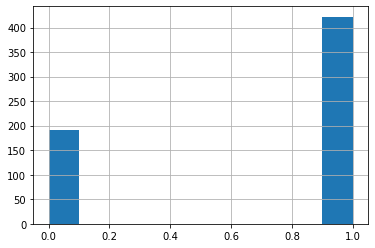

In [44]:
print("Count of Negative class: ",list(train["Loan_Status"]).count(0))
print("Count of Positive class: ",list(train["Loan_Status"]).count(1))
train["Loan_Status"].hist()

In [45]:
data_bal = train.copy()

from sklearn.utils import resample
df_majority = data_bal[data_bal.Loan_Status==0]
df_minority = data_bal[data_bal.Loan_Status==1]

df_manjority_downsampled = resample(df_majority,replace=True,n_samples=422,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Loan_Status.value_counts())

df_monority_upsampled = resample(df_minority,replace=False,n_samples=192,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.Loan_Status.value_counts())

Downsampled data:->
 1    422
0    422
Name: Loan_Status, dtype: int64
Upsampled data:->
 1    192
0    192
Name: Loan_Status, dtype: int64


In [46]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report , accuracy_score,plot_confusion_matrix

In [47]:
X = df_downsampled.drop(["Loan_Status"],axis=1)
Y = df_downsampled["Loan_Status"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[17:00:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        93
           1       0.82      0.95      0.88        76

    accuracy                           0.88       169
   macro avg       0.88      0.89      0.88       169
weighted avg       0.89      0.88      0.88       169

0.8816568047337278


C:\Users\ABHISHEK\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [48]:
X = df_upsampled.drop(["Loan_Status"],axis=1)
Y = df_upsampled["Loan_Status"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier()
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

[17:00:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.68      0.71      0.69        35
           1       0.75      0.71      0.73        42

    accuracy                           0.71        77
   macro avg       0.71      0.71      0.71        77
weighted avg       0.72      0.71      0.71        77

0.7142857142857143


# MODEL SELECTION

In [49]:
X = df_downsampled.drop(["Loan_Status"],axis=1)
Y = df_downsampled["Loan_Status"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=27)
 
Model1 = AdaBoostClassifier()
Model1.fit(X_train,y_train)
y_pred1 = Model1.predict(X_test)
print(classification_report(y_pred1,y_test))

print("AdaBoostClassifier:>",accuracy_score(y_pred,y_test))

Model2 = GradientBoostingClassifier(random_state=0)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
print(classification_report(y_pred,y_test))
print("GradientBoostingClassifier:>",accuracy_score(y_pred,y_test))
 
Model3 = XGBClassifier(learning_rate =0.1,n_estimators=10000)
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
print(classification_report(y_pred,y_test))
print("XGBoost:>",accuracy_score(y_pred,y_test))
 
from catboost import CatBoostClassifier
Model4 = CatBoostClassifier(learning_rate=0.1)
Model4.fit(X_train,y_train, verbose=False)
y_pred = Model4.predict(X_test)
print(classification_report(y_pred,y_test))
print("CatBoostingClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.83      0.74        72
           1       0.85      0.68      0.75        97

    accuracy                           0.75       169
   macro avg       0.75      0.76      0.75       169
weighted avg       0.77      0.75      0.75       169



ValueError: Found input variables with inconsistent numbers of samples: [77, 169]

# COMPARING ACCURACIES

<AxesSubplot:>

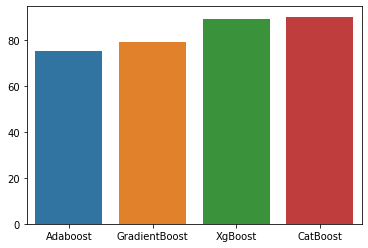

In [32]:
classifiers=["Adaboost","GradientBoost","XgBoost","CatBoost"]
accuracy=[75,79,89,90]
sns.barplot(x=classifiers,y=accuracy)

In [63]:
train.head(10)

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        0           0          1              0           5849.0   
1       1        1           1          1              0           4583.0   
2       1        1           0          1              1           3000.0   
3       1        1           0          0              0           2583.0   
4       1        0           0          1              0           6000.0   
5       1        1           2          1              1           5417.0   
6       1        1           0          0              0           2333.0   
7       1        1           3          1              0           3036.0   
8       1        1           2          1              0           4006.0   
9       1        1           1          1              0           3812.5   

   LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status  
0       129.0             360.0               1              2            1  
1       128.0             360.0               1              0            0  
2        66.0             360.0               1              2            1  
3       120.0             360.0               1              2            1  
4       141.0             360.0               1              2            1  
5       267.0             360.0               1              2            1  
6        95.0             360.0               1              2            1  
7       158.0             360.0               0              1            0  
8       168.0             360.0               1              2            1  
9       129.0             360.0               1              1            0

In [65]:
import pickle

In [49]:
pickle.dump(Model4,open('modelcat.pkl','wb'))

In [66]:
catb=pickle.load(open('modelcat.pkl','rb'))

In [67]:
catb.predict([[1,1,2,1,0,4006,168,360,1,2]])

array([1], dtype=int64)